<a href="https://colab.research.google.com/github/So-AI-love/academic-courses-Pattern-Recognition/blob/main/Predictions/1/time_series_rnn_full_predict_97_Correct_main_data_no_local_skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a good ( **99% correct**) prediction for so-so.csv Data (5 input and 1 output). this page made from this Colab Page:

> Indented block



https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-rnn-full-predict.ipynb#scrollTo=WJJcT-mZh915


In [1]:

# import os,sys

# sys.path.insert(0,'/content/')
# if not os.path.exists("/root/.ipython/ocr.py"):
#     from subprocess import run
#     from shlex import split

#     shellCmd = "wget -qq https://raw.githubusercontent.com/biplobsd/OneClickRun/master/res/ocr.py \
#                     -O /content/ocr.py"
#     run(split(shellCmd))
# from ocr import runSh

# def runShT(args):
#     return runSh(args, output=True)
# runShT('bash simple_shell_script.sh')

In [2]:
# %%writefile simple_shell_script2.sh
# Current_dir=$PWD
# echo "current dir is ${Current_dir}"
# # from google.colab import drive
# # drive.mount('/content/gdrive')
# # !cp '/content/gdrive/MyDrive/Amir Farzin Project/so-so.csv' /content/stock-prediction
# # !wget https://transfer.sh/o5273/so-so.csv
# echo "cd ${Current_dir}"
# cd ${Current_dir}//stock-prediction

# git clone https://github.com/So-AI-love/Test_NN
# unzip -o  "${Current_dir}/Test_NN/so-so.zip" -d "${Current_dir}/Test_NN"
# cp "${Current_dir}/Test_NN/so-so.csv" "${Current_dir}/"

In [3]:
!pwd 

/content


In [4]:
# runShT('bash simple_shell_script2.sh')

In [5]:
!pip install google-colab

In [6]:
from google.colab import files , drive
# files.upload()
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
import pandas as pd
# data_dir = "https://dlsun.github.io/pods/data/"
# df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
# df_ames.head()

In [9]:

# df = pd.read_csv('so-so.csv')
# df=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_input.csv')
# df2=pd.read_csv('/home/so/Downloads/Telegram Desktop/Data_08_2020_output - S.csv')

df=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_input.csv')
df2=pd.read_csv('/content/gdrive/MyDrive/Amir Farzin Secure Data/Data_08_2020_output - S.csv')

df.head()
df2.head()


,Time,CO2
0,17-08-20 0:00,291.252600
1,17-08-20 0:01,291.656027
2,17-08-20 0:02,288.467146
3,17-08-20 0:03,282.867887
4,17-08-20 0:04,283.057879


In [10]:
df.head()


,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372


In [11]:
print(df.shape);print(df2.shape)

(15840, 46)
(15840, 2)


In [12]:
import re, regex
ddd=df['Time'].str
# df['day_of_week']= ddd.split('.').str[-1]
# df['time']= ddd.split('.').str[0]
# df['day_of_week']=pd.to_datetime(df['day_of_week'], format='%H:%M', errors='ignore') #
# df=df[['Time','day_of_week','-1-','-2-','-3-','-4-','-5-','out']]
# df=df[['-1-','-2-','-3-','-4-','-5-','out']]
df['CO2']= df2['CO2']
df.head()

,Time,FIC_1321_SP,FIC_1321_PV,FIC_1321_OUT,RIC_1311_SP,RIC_1311_PV,RIC_1311_OUT,RIC_1320_SP,RIC_1320_PV,RIC_1320_OUT,TIC_1150_SP,TIC_1150_PV,TIC_1150_OUT,TIC_1250_SP,TIC_1250_PV,TIC_1250_OUT,PDIC_1413_SP,PDIC_1413_PV,PDIC_1413_OUT,FIC_204_SP,FIC_204_PV,FIC_204_OUT,FIC_205_SP,FIC_205_PV,FIC_205_OUT,FIC_602_SP,FIC_602_PV,FIC_602_OUT,FIC_1360_SP,FIC_1360_PV,FIC_1360_OUT,PIC_329_SP,PIC_329_PV,PIC_329_OUT,FIC_202_SP,FIC_202_PV,FIC_202_OUT,FIC_203_SP,FIC_203_PV,FIC_203_OUT,TI_3733-1_PV,TI_3130_PV,TY_1329_PV,TY_1331_PV,AI_151_PV,TI_252-1_PV,CO2
0,17-Aug-20 00:00:00,60.519039,60.491921,57.805900,3.317911,3.317911,21150.0,3.345023,3.345108,37228.85942,760.799988,761.044315,1.812243,760.200012,760.329042,1.795578,1.087846,1.087846,22.0,410.0,408.058692,69.331706,410.0,412.411950,65.635773,6000.0,5989.442423,11.809569,3554.202036,3554.202036,74.0,26.0,25.992372,92.594480,81.0,80.833493,33.525105,81.0,80.807097,35.470481,29.864918,18.835617,1101.628345,948.276040,0.377546,178.434269,291.252600
1,17-Aug-20 00:01:00,60.519039,60.573661,57.791111,3.317911,3.317911,21150.0,3.341907,3.342012,37228.29533,760.799988,761.042964,1.812041,760.200012,760.323124,1.795520,1.087690,1.087690,22.0,410.0,408.532078,69.470408,410.0,412.140233,65.640992,6000.0,5990.331913,11.819274,3552.880731,3552.880731,74.0,26.0,25.999317,93.633696,81.0,80.913462,33.588194,81.0,80.536010,35.563675,29.863531,18.806534,1101.652565,948.227688,0.377306,178.422690,291.656027
2,17-Aug-20 00:02:00,60.519039,60.525547,57.817259,3.317911,3.317911,21150.0,3.343107,3.343039,37243.92034,760.799988,761.041421,1.812067,760.200012,760.349170,1.795539,1.087369,1.087369,22.0,410.0,408.159187,69.575323,410.0,410.562369,65.731597,6000.0,5984.962090,11.842718,3545.332073,3545.332073,74.0,26.0,26.003898,93.751042,81.0,81.052741,33.730155,81.0,80.592873,35.613573,29.862143,18.804466,1101.737909,948.318011,0.377958,178.378130,288.467146
3,17-Aug-20 00:03:00,60.519039,60.503820,57.830657,3.317911,3.317911,21150.0,3.342583,3.342583,37235.57606,760.799988,761.042077,1.812122,760.200012,760.366613,1.795609,1.085633,1.085633,22.0,410.0,408.659043,69.568745,410.0,410.050967,65.744806,6000.0,5986.416733,11.854616,3542.121978,3542.121978,74.0,26.0,25.999462,93.342203,81.0,80.893861,33.772829,81.0,81.011394,35.753719,29.860755,18.823079,1101.876815,948.502915,0.379097,178.333710,282.867887
4,17-Aug-20 00:04:00,60.519039,60.520480,57.830769,3.317911,3.317911,21150.0,3.343532,3.343532,37234.87327,760.799988,761.036160,1.812037,760.200012,760.378198,1.795501,1.089943,1.089943,22.0,410.0,409.931374,69.595012,410.0,410.200509,65.740786,6000.0,5988.303974,11.866623,3536.746794,3536.746794,74.0,26.0,26.002769,91.878288,81.0,80.669406,33.801514,81.0,80.989015,35.764862,29.859368,18.810354,1101.977778,948.567782,0.379366,178.387372,283.057879


# Forecasting Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* Some code and approaches from: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Nice tutorial: https://www.tensorflow.org/beta/tutorials/text/time_series

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

https://ronakchhatbar.medium.com/box-cox-transformation-cba8263c5206
![enter image description here](https://i.stack.imgur.com/9PKEF.png)

In [14]:
# from scipy import stats
# import pandas as pd
# import numpy as np
# import pylab 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# %matplotlib inline
# from scipy.stats import skew
# import numpy as np
# from sklearn.preprocessing import power_transform
# continuous= df.columns 
# continuous=['-1-','-2-','-3-','-4-','-5-','out']
# data_combine=df

# sns.distplot(df['-1-'])
# print("Skewness for the out Parameter:",skew(df['out']))
# sns.distplot(df['out'])
# print("Skewness for the -1- Parameter:",skew(df['-1-']))

# stats.probplot(df['-1-'], dist='norm', plot=pylab)
# pylab.show()
# stats.probplot(df['out'], dist='norm', plot=pylab)
# pylab.show()

# skewed_box_cox, lmda = stats.boxcox(abs(df['-1-']))
# sns.distplot(skewed_box_cox)

In [37]:
# From https://colab.research.google.com/github/khalidmeister/Customer-Segmentation-using-Python/blob/master/Customer%20Segmentation%20in%20Python.ipynb#scrollTo=wsjXuL-Evmo-

from scipy import stats
import seaborn as sns, numpy as np

def analyze_skewness(customers,x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5));
    print(customers)
    sns.distplot(customers[x], ax=ax[0,0]); #ax.set_title('Data'+ str(var)+'is :')
    sns.distplot(np.log(customers[x]), ax=ax[0,1]);#plt.title('Data'+ str(var)+'np.log is :')
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0]);#plt.title('Data'+ str(var)+'np.sqrt is :')
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1]); #plt.title('Data'+ str(var)+'stats.boxcox Trasnformation is :')
    plt.tight_layout()
    
    plt.show()
    
    print("Skewness for the ",x," Parameter:",customers[x].skew().round(2))
    print("Skewness for the ",x," Parameter by log mehtod is:",np.log(customers[x]).skew().round(2))
    print("Skewness for the ",x," Parameter by sqrt method is :",np.sqrt(customers[x]).skew().round(2))
    print("Skewness for the ",x," Parameter by BoxCox method is:",pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734  340.818178

[15840 rows x 46 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

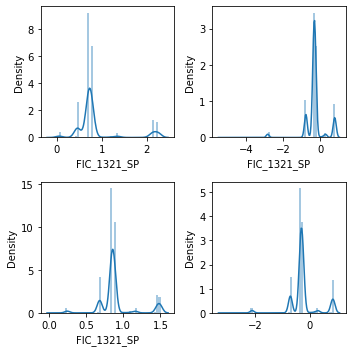

Skewness for the  FIC_1321_SP  Parameter: 2.0
Skewness for the  FIC_1321_SP  Parameter by log mehtod is: -1.17
Skewness for the  FIC_1321_SP  Parameter by sqrt method is : 1.24
Skewness for the  FIC_1321_SP  Parameter by BoxCox method is: 0.18
-0.13876101821335335
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734  34

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

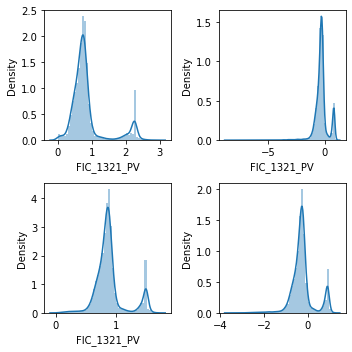

Skewness for the  FIC_1321_PV  Parameter: 1.85
Skewness for the  FIC_1321_PV  Parameter by log mehtod is: -1.71
Skewness for the  FIC_1321_PV  Parameter by sqrt method is : 1.07
Skewness for the  FIC_1321_PV  Parameter by BoxCox method is: 0.19
-0.127034916332372
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734  340

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

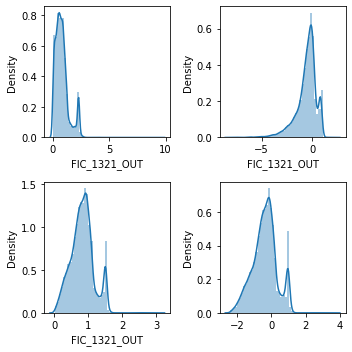

Skewness for the  FIC_1321_OUT  Parameter: 1.95
Skewness for the  FIC_1321_OUT  Parameter by log mehtod is: -1.64
Skewness for the  FIC_1321_OUT  Parameter by sqrt method is : 0.28
Skewness for the  FIC_1321_OUT  Parameter by BoxCox method is: -0.01
0.07204431900560818
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.61673

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

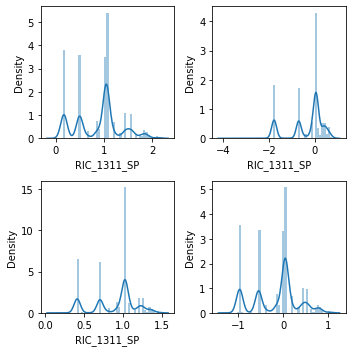

Skewness for the  RIC_1311_SP  Parameter: 0.03
Skewness for the  RIC_1311_SP  Parameter by log mehtod is: -0.99
Skewness for the  RIC_1311_SP  Parameter by sqrt method is : -0.52
Skewness for the  RIC_1311_SP  Parameter by BoxCox method is: -0.22
-0.23632415714005384
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

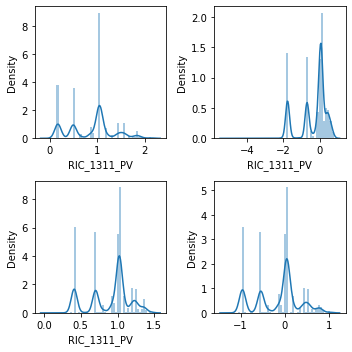

Skewness for the  RIC_1311_PV  Parameter: 0.03
Skewness for the  RIC_1311_PV  Parameter by log mehtod is: -1.02
Skewness for the  RIC_1311_PV  Parameter by sqrt method is : -0.52
Skewness for the  RIC_1311_PV  Parameter by BoxCox method is: -0.21
-0.23690659393119423
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

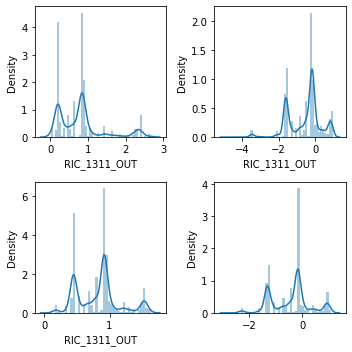

Skewness for the  RIC_1311_OUT  Parameter: 1.34
Skewness for the  RIC_1311_OUT  Parameter by log mehtod is: -0.63
Skewness for the  RIC_1311_OUT  Parameter by sqrt method is : 0.47
Skewness for the  RIC_1311_OUT  Parameter by BoxCox method is: -0.03
0.022278363130751138
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.6167

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

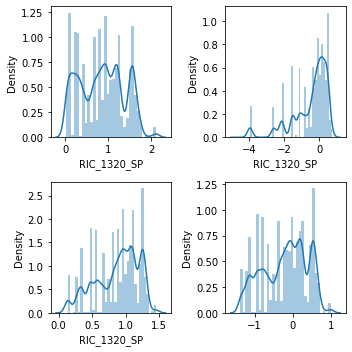

Skewness for the  RIC_1320_SP  Parameter: 0.04
Skewness for the  RIC_1320_SP  Parameter by log mehtod is: -1.58
Skewness for the  RIC_1320_SP  Parameter by sqrt method is : -0.55
Skewness for the  RIC_1320_SP  Parameter by BoxCox method is: -0.29
0.3099657247236659
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734  3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

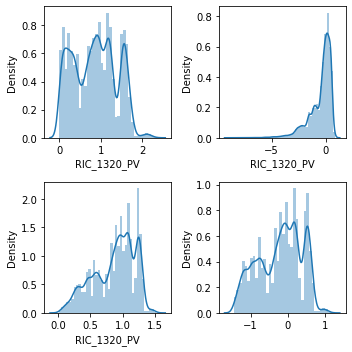

Skewness for the  RIC_1320_PV  Parameter: 0.06
Skewness for the  RIC_1320_PV  Parameter by log mehtod is: -1.85
Skewness for the  RIC_1320_PV  Parameter by sqrt method is : -0.55
Skewness for the  RIC_1320_PV  Parameter by BoxCox method is: -0.29
0.30691197790607816
       FIC_1321_SP  FIC_1321_PV  ...  TI_252-1_PV         CO2
0         2.258792     2.263869  ...   178.434269  291.252600
1         2.258792     2.251687  ...   178.422690  291.656027
2         2.258792     2.258973  ...   178.378130  288.467146
3         2.258792     2.262155  ...   178.333710  282.867887
4         2.258792     2.259721  ...   178.387372  283.057879
...            ...          ...  ...          ...         ...
15835     0.709990     0.602079  ...   180.813777  363.441998
15836     0.709990     0.513484  ...   180.724542  357.035652
15837     0.709990     0.385786  ...   180.632631  360.172909
15838     0.649495     0.380674  ...   180.635061  347.798229
15839     0.181378     0.392067  ...   180.616734  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

LinAlgError: ignored

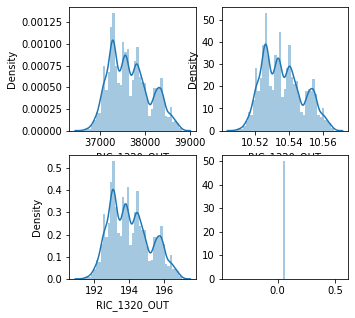

In [38]:
#https://colab.research.google.com/github/jhihan/Housing_Price_Kaggle/blob/master/Housing_Price.ipynb#scrollTo=6BggFAsxMVk3
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import power_transform
cols_plot = df.columns #['-1-', '-2-', 'out']
data_combine=df;continuous= df.columns;#print(data_combine.columns[-1:])
j=0;
for var in continuous:
  if j==0:
    j=1;
  else:

      analyze_skewness(abs(data_combine[data_combine.columns[1:]]),var)
      skewness=skew(data_combine[var])
      print(skewness)
      if abs(skewness) > 0.5:
        print(skew(data_combine[var]))
        print(var,"too large")
        data_combine[var]=power_transform(data_combine[var].values.reshape(-1, 1), method='box-cox')
        # data_combine[var]=np.log1p(data_combine[var]+1e-99)
        print(skew(data_combine[var]))
        print(var,"after transformed")

In [ ]:
cols_plot = df.columns #['-1-', '-2-', 'out']

axes = data_combine[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [ ]:
continuous= df.columns 
data_combine=df
for var in continuous:
  analyze_skewness(abs(data_combine),var)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customers['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [ ]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

In [ ]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

# time_series_df = pd.read_csv(url, 
#                              sep=',', 
#                              index_col=0, # you can use the date as the index for pandas
#                              parse_dates=[0]) # where is the time stamp?

time_series_df=df;


In [ ]:
time_series_df.head()

In [ ]:
# cols_plot = ['Consumption', 'Solar', 'Wind']

cols_plot = df.columns #['-1-', '-2-', 'out']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [ ]:
axes = time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily Totals (GWh)');

## Can we predict each day's CO2 Production from its past?

### We train on the years 2006 - 2016 and validate on 2017

In [ ]:
# CO2_Production = time_series_df['Consumption'].to_numpy()
CO2_Production = time_series_df[df.columns[46]].to_numpy()
print(df.columns[46])
CO2_Production.shape

In [ ]:
plt.title('CO2 from xxx to xxx')
plt.plot(CO2_Production);

## Statistical Methods directly geared towards forecasting

_Statistical Methods are often favorable: https://twitter.com/togelius/status/1173272424177119233_

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* https://research.fb.com/prophet-forecasting-at-scale/

https://www.statsmodels.org
* https://www.statsmodels.org/stable/examples/index.html#stats
* https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
* https://www.statsmodels.org/stable/tsa.html



In [ ]:
# import statsmodels.api as sm

# decomposition = sm.tsa.seasonal_decompose(time_series_df['out'], model='additive')
# decomposition.plot();

In [ ]:
# derived from here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### How much of the past would we like for each individual prediction?

In [ ]:
#@title Prediction from n past days

# https://colab.research.google.com/notebooks/forms.ipynb

n_steps_in = 30 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 1

In [ ]:
X, Y = split_sequence(CO2_Production, n_steps_in, n_steps_out)
X.shape, Y.shape

In [ ]:
X[0], Y[0]

In [ ]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

In [ ]:
# we do a special test / train split, 
# we see how well we can predict 2017 as test/validation 

X_train = X[-5840:]
Y_train = Y[-5840:]

X_test = X[:10000]
Y_test = Y[:10000]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

## Baslines

### R2 Metric: MSE and MAE are not speaking

* R^2 score, the closer to 1 the better
* loosely speaking: how much better is this than predicting the constant mean
* 0 would mean just as good
* 1 is perfect
* neg. would mean even worse
* it can become arbitrarily worse

https://en.wikipedia.org/wiki/Coefficient_of_determination


### Rolling mean baseline

In [ ]:
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [ ]:
Y_pred_baseline_rolling = rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

In [ ]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(consumption[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');


In [ ]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_rolling)

### Baseline: Previous Value

In [ ]:
def previous_value_baseline(history):
  return history[:, -1]

In [ ]:
Y_pred_baseline_previous_value = previous_value_baseline(X)
Y_pred_baseline_previous_value.shape

In [ ]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(consumption[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[::stride], color='r', ls='dashed')
plt.title('Prediction using the previous value');

### This looks good at first sight, but wait for the R2 score

It is (obviously) always off by one

In [ ]:
from sklearn.metrics import r2_score

r2_score(Y, Y_pred_baseline_previous_value)

In [ ]:
# this gets really crowded, using a stride, makes it more readable
stride = 1
# too crwoded, zoom in
window_start = 300
window_end = 600

plt.plot(consumption[n_steps_in+window_start:n_steps_in+window_end:stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_previous_value[window_start:window_end:stride], color='r', ls='dashed')

plt.title('Prediction using the previous value, zooming in reveals its issue');

## Prediction using RNNs and TensorFlow

### Can we beat an r2 score around .20?

In [ ]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Just for the reference, what GPU are we running on?

In [ ]:
# What kind of GPU are we running on
!nvidia-smi

In [ ]:
# adapted from https://stackoverflow.com/a/42351397/1756489 and ported to TF 2
# https://keras.io/metrics/#custom-metrics

# only works on tensors while training, use sklearn version when using on numpy arrays

def r2_metric(y_true, y_pred):
  total_error = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  R_squared = tf.subtract(1.0, tf.divide(unexplained_error, total_error))
  
  return R_squared

### Training our model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

model = Sequential()

# two layer model, known to work well
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))

# trains faster, but also works
# model.add(GRU(256, activation='relu', input_shape=(n_steps_in, n_features)))

# one layer SimpleRNN seems to be enough for this data set
model.add(SimpleRNN(256, activation='relu', input_shape=(n_steps_in, n_features)))

# horrible results
# model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(64, activation='relu'))

# optional regularization
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# combines final outputs from RNN into continous output
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse', metrics=[r2_metric])

model.summary()

In [ ]:
%%time

batch_size = 32
epochs=25

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    verbose=1)

In [ ]:
plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Log Loss over Epochs')

plt.legend(['loss', 'validation loss']);

In [ ]:
plt.yscale('log')
plt.plot(history.history['r2_metric'])
plt.plot(history.history['val_r2_metric'])
plt.title('R^2 over Epochs')

plt.legend(['r2', 'validation r2']);

In [ ]:
model.evaluate(X, Y, batch_size=batch_size, verbose=0)

### R2 for all data

In [ ]:
from sklearn.metrics import r2_score

Y_pred = model.predict(X)
r2_score(Y, Y_pred)

### R2 for training data

In [ ]:
Y_train_pred = model.predict(X_train)
r2_score(Y_train, Y_train_pred)

### R2 for validation data

In [ ]:
Y_test_pred = model.predict(X_test)
r2_score(Y_test, Y_test_pred)

## Let's plot predicted and true over each other

In [ ]:
# this gets really crowded, using a stride, makes it more readable
stride = 10

# for the first 90 days we have no prediction, so get rid of them
plt.plot(CO2_Production[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred[::stride], color='r', ls='dashed')

plt.title('All data, train and test combined, stride 10');


In [ ]:
stride = 1


plt.plot(CO2_Production[-2 * 365:-365:stride], alpha=0.5, color='g')
plt.plot(Y_train_pred[-365::stride], color='r', ls='dashed')

plt.title('Trained data, xxxx year only, no stride');


In [ ]:
stride = 1


plt.plot(CO2_Production[-365::stride], alpha=0.5, color='g')
plt.plot(Y_test_pred[::stride], color='r', ls='dashed')

plt.title('Test data, xxx+1 Year, no stride');


## Observation / Wrap-Up

### overall a pretty good result
* r2 score is pretty promising
* defintely improved over baseline
* no domain knowledge necessary

### no dramatic difference between training and test data
* neither in metrices
* nor in visual inspection

### peaks and valleys are underestimated very often
* but often the most interesting part
* this seems to be a common problem in time series prediction
* it gets better we train the model for longer
* also when we increase its capacity
* on the other hand this might counter regularization


## Next Steps
  
### make use of seasonal decomposition
* predict each of the components
  * trend should be pretty easy
  * residual shows clear spices on national holidays
  * remove them
  * the results might be noise only
  * but maybe it is not, train a model on it to check
  
### have a more powerful statistical baseline
* Use more powerful statistical models
  * https://www.statsmodels.org/stable/tsa.html
  * http://www.statsmodels.org/dev/tsa.html
  * http://www.statsmodels.org/dev/vector_ar.html
* MSBVAR (Markov-Switching, Bayesian, Vector Autoregression Models) might beat our model, but
  * needs a lot of modelling 
  * does not seem readily available in the Python world (in R it would be)
  
